# А/В тест для интернет магазина 

Наша задача выбрать наиболее перспективную гипотезу и проанализировать результаты А/В теста  

## Часть 1. Приоритизация гипотез

Выберем наиболее перспективную гипотезу из 9ти вариантов   

In [1]:

# Импортируем необходимые библиотеки    
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

# Загрузим данные
try:
    data_hypothesis = pd.read_csv ('/datasets/hypothesis.csv')
except: 
    data_hypothesis = pd.read_csv ('hypothesis.csv')

In [2]:
pd.options.display.max_colwidth = 100
data_hypothesis #Выведем на экран датасет


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Приведём название столбцов к «змеиному стилю»    
data_hypothesis=data_hypothesis.rename(
    columns={'Hypothesis': 'hypothesis', 
             'Reach': 'reach', 
             'Impact':'impact', 
             'Confidence':'confidence',
             'Efforts':'efforts'}
)


In [4]:
# Применим фреймворк ICE для приоритизации гипотез
pd.options.display.max_colwidth = 100
data_hypothesis['ICE'] = data_hypothesis['impact']*data_hypothesis['confidence']/data_hypothesis['efforts']
data_hypothesis [['hypothesis' ,'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


ICE Показал что наиболее перспективные гипотезы под номерами 8, 0 и 7

In [5]:
# И проведём приоритизацию гипотез методом RICE
pd.options.display.max_colwidth = 100
data_hypothesis['RICE'] = (
    data_hypothesis['reach']*
    data_hypothesis['impact']*
    data_hypothesis['confidence']/
    data_hypothesis['efforts']
)


data_hypothesis [['hypothesis' ,'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


А вот метод RICE дал несколько другое распределение приоритетов гипотез, а именно 7,2 и 0
Отличия связаны с тем что при подсчёте методом ICE  не учитывается параметр Reach  который в гипотезе 8 минимальный из всех представленных гипотез 


In [6]:
data_hypothesis_top=data_hypothesis[['hypothesis' ,'ICE','RICE']].sort_values(['RICE','ICE'],ascending= False)

def highlight_max(s):
    if s.dtype == object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]
  
data_hypothesis_top.style.apply(highlight_max)







,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


Исходя из анализа приоритизации гипотез методами «ICE» и «RICE» стоит остановится на гипотезах  7, 2 или 0

## Анализ A/B-теста

Посмотрим на результаты А/В теста

### Открываем файл с данными и изучите общую информацию

In [7]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib 
register_matplotlib_converters()

# Загрузим данные
try:
    data_orders = pd.read_csv ('/datasets/orders.csv', sep=',')
except: 
    data_orders = pd.read_csv ('orders.csv', sep=',')

# конвертируем дату
data_orders['date'] = data_orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# Загрузим данные
try:
    data_visitors = pd.read_csv ('/datasets/visitors.csv', sep=',')
except: 
    data_visitors = pd.read_csv ('visitors.csv', sep=',')
 

 # конвертируем дату   
data_visitors['date'] = data_visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
data_orders.head() #Выведем на экран первые 5 строк по каждому датасету

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
data_orders.info() #Выведем на экран  информацию по каждому датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
# Проверили на наличие явных дубликатов и не обнаружили их
data_orders.duplicated().sum()

0

In [11]:
data_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
data_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
data_visitors.duplicated().sum()

0

Пропусков значений и нарушения стиля написания названия столбцов в обоих файлах нет

### Предобработка данных

Проверим, есть ли пользователи, которые попали и в группу А и в группу В. Это может нарушить правильность теста

In [14]:
a_b_user = data_orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')
a_b_user.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


Да пользователи которые есть сразу в двух группах нашлись. Посмотрим их количество, и так же повнимательнее посмотрим на одного из таких пользователей 

In [15]:
a_b_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 1026
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   visitorId  58 non-null     int64
 1   group      58 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [16]:
data_orders [data_orders.visitorId==8300375]

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


In [17]:
#Удалим пользователей которые попали сразу в 2 группы  
data_orders=data_orders.loc[~((data_orders.visitorId.isin(a_b_user['visitorId'])))]

Проверим, всё ли сработало правильно  

In [18]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [19]:
data_orders [data_orders.visitorId==8300375]

,transactionId,visitorId,date,revenue,group


Мы удалили данные пользователей, которые могли негативно повлиять на результаты тестирования. Пора приступать непосредственно, а анализу А/В теста  

### Проанализируем A/B-тест

Для начала сформулируем гипотизы 
Нулевая гипотеза: Нет различий в среднем количестве заказов между группами . 
Альтернативная:   Различия в среднем между группами есть.

#### Построим график кумулятивной выручки по группам

In [20]:
# создаем уникальные пары значений дат и групп в тесте

dates_groups = data_orders[['date','group']].drop_duplicates() 
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [21]:

# Соберём агрегированные кумулятивные данные о заказах по дням 
orders_aggregated = dates_groups.apply(
    lambda x: data_orders[
        np.logical_and(
            data_orders['date'] <= x['date'], data_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# и о посетилелях

visitors_aggregated = dates_groups.apply(
    lambda x: data_visitors[
        np.logical_and(
            data_visitors['date'] <= x['date'], data_visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Проверим что у нас получилось
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


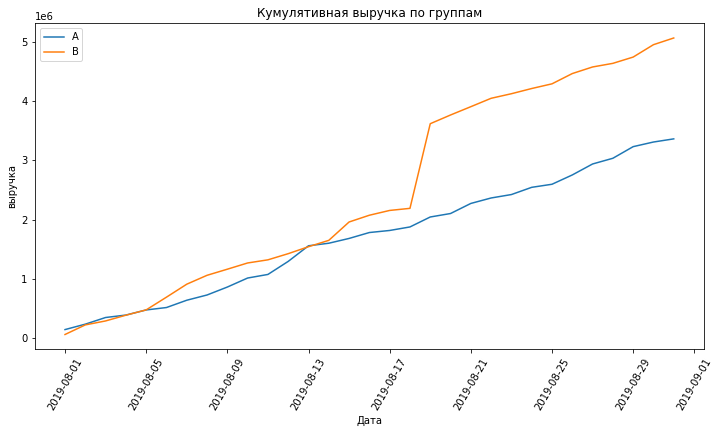

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Увеличим размер графика 
plt.figure(figsize=(12,6))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.xticks(rotation=60 )
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата' )
plt.ylabel("выручка")

plt.legend() 

plt.show()

В группе B  в середине теста наблюдается резкий рост показателей. Группа А ведёт себя очень стабильно 

#### Построим графики среднего чека по группам

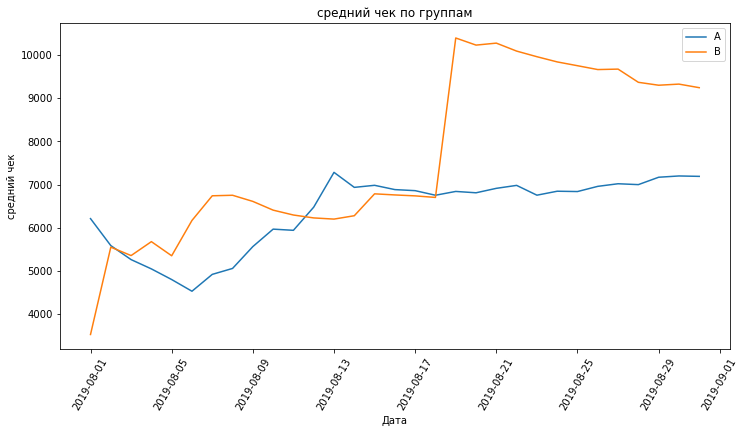

In [23]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xticks(rotation=60 )
plt.title('средний чек по группам')
plt.xlabel('Дата' )
plt.ylabel("средний чек")
plt.legend() 
plt.show()

И показатели среднего чека в группе В так же показали сильный скачок в середине теса 

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

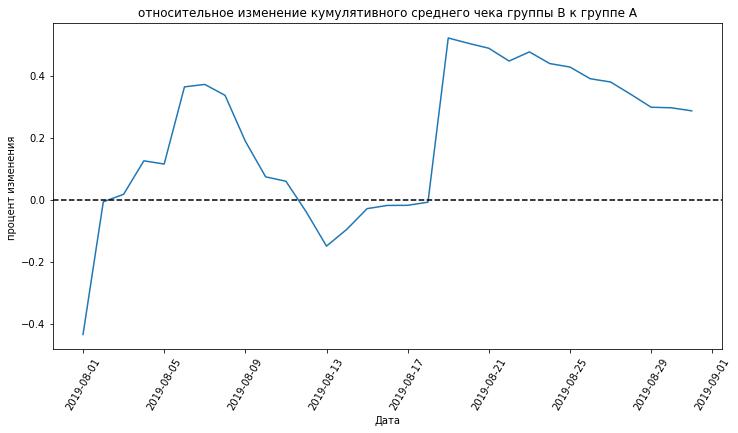

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (
    cumulative_revenue_a.merge(cumulative_revenue_b, 
                               left_on='date', 
                               right_on='date', 
                               how='left', 
                               suffixes=['A', 'B'])
)
plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=60 )
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата' )
plt.ylabel("процент изменения ")
plt.show()

На графике мы видим резкие скачки, что может говорить нам о что были крупные заказы которые можно посчитать выбросами 

#### Построим график кумулятивной конверсии по группам

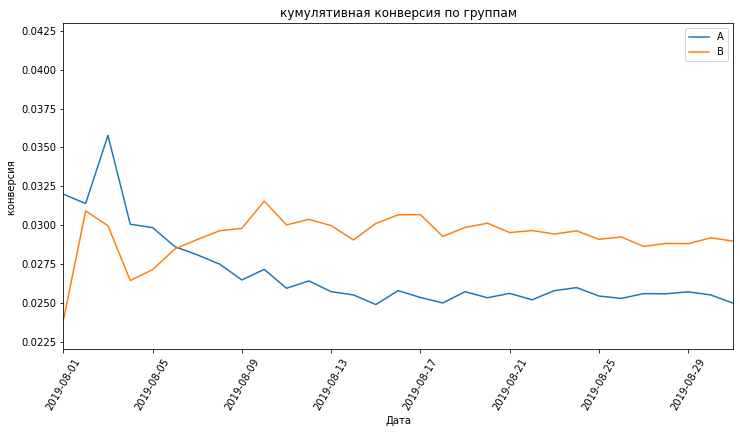

In [25]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(12,6))
# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.022, 0.043]) 
plt.xticks(rotation=60 )
plt.title('кумулятивная конверсия по группам')
plt.xlabel('Дата' )
plt.ylabel("конверсия ")
plt.show()

В начале теста группа А имела большую конверсию, но затем тенденция изменилась и группа В занимает уверенную лидирующую позицию 

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A

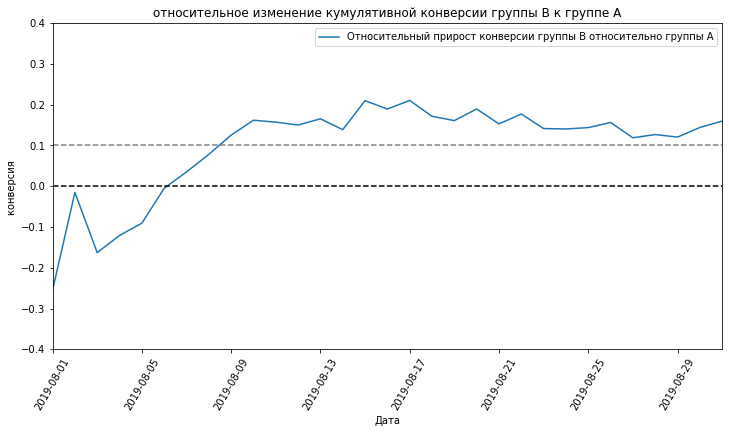

In [26]:
merged_сumulative_сonversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], 
       left_on='date', right_on='date', 
       how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(12,6))

plt.plot(merged_сumulative_сonversions['date'], 
         merged_сumulative_сonversions['conversionB']/
         merged_сumulative_сonversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")


plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.4, 0.4]) 
plt.xticks(rotation=60 )
plt.title('относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата' )
plt.ylabel("конверсия ")
plt.show()

Видим колебание конверсии между группами А и В в начале теста. В какой то момент группа А лидировала. Но на 8й день теста   группа В начала лидировать по конверсии и закрепилась в районе 10% - 15%

#### Построим точечный график количества заказов по пользователям

In [27]:
# Найдём число заказов по пользователям

orders_by_users = (
    data_orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['userId', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


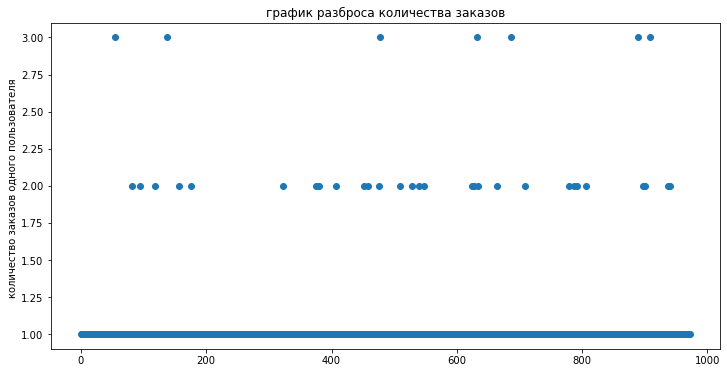

In [28]:
# Построим точечный график количества заказов

x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('график разброса количества заказов')
plt.ylabel("количество заказов одного пользователя ")
plt.show()

Подавляющее большинство клиентов делали один заказ, небольшое количество людей сделало 2 или 3 заказа 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
# Посчитаем перцентили методом np.percentile()

np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Видим что не более 1% пользователей оформили 2 заказа.
Установим верхнюю границу количества заказов в 1 заказ. Остальных будим считать, как аномальных    

#### Построим точечный график стоимостей заказов по пользователям

In [30]:
data_orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Как видим есть заказы стоимость которых доходит почти до 1 300 000  

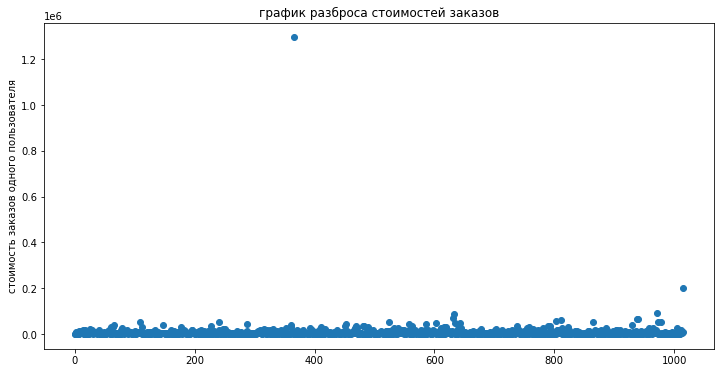

In [31]:
# Построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(data_orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, data_orders['revenue']) 
plt.title('график разброса стоимостей заказов')
plt.ylabel("стоимость заказов одного пользователя")
plt.show()

#### Посчитаем 95-й и 99-й перцентили стоимостей заказов на пользователя

In [32]:
# Посчитаем перцентили методом np.percentile()
print(np.percentile(data_orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


 Видим, что не более 5% заказов стоимостью более 26 700 и не более 1% заказов стоимостью более 54 000.
Установим верхнюю границу стоимости заказов в 27 000. Более дорогие будим считать, как аномальные  

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 

In [33]:
# Подготовим данные

visitors_a_daily = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    data_orders[data_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    data_orders[data_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [34]:
# Создадим переменные в которых пользователи которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

orders_by_users_a = (
    data_orders[data_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorId', 'orders']

orders_by_users_b = (
    data_orders[data_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorId', 'orders'] 

In [35]:
# Объявим переменные  в которых пользователям из разных групп будет соответствовать количество заказов. 
sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series
     (0, index=np.arange(data['visitors_per_date_a']
    .sum() - len(orders_by_users_a['orders'])), 
      name='orders')],axis=0
)


sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series
     (0, index=np.arange(data['visitors_per_date_b']
    .sum() - len(orders_by_users_b['orders'])), 
      name='orders')],axis=0
)

# найдём относительные различия в среднем количестве заказов между группами по сырым данным
print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.011
0.160


Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу, по «сырым» данным, о том, что нет статистически значимых различий в среднем числе заказов между группами , отвергаем. Признаём верной гипотезу о том что есть значимые различия в группах.  Относительный проигрыш группы B равный 16% нам это подтверждает — второе число в выводе.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [36]:

print(
    '{0:.3f}'.format(stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], 
                                        data_orders[data_orders['group']=='B']['revenue'])[1])
)


print(
    '{0:.3f}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()
                     /data_orders[data_orders['group']=='A']['revenue'].mean()-1)
) 

0.829
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу нет. считатаем, что в среднем чеке нет различия. 
Впрочем, средний чек группы B значительно почти на 29% больше чека группы A. Возможно это связанно с выбросами

### Проанализируем A/B-тест на "чистых" данных

Вновь сформулируем гипотезу : Нулевая гипотеза: Нет различий в среднем количестве заказов между группами по «очищенным данным» .
 Альтернативная: Есть различия в среднем между группами «очищенным данным»


#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

In [37]:
# Для начала узнаем общее количество «аномальных» пользователей  которых мы определили ранее 
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 1]['visitorId'],
        orders_by_users_b[orders_by_users_b['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
users_with_expensive_orders = data_orders[data_orders['revenue'] > 27000]['visitorId']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


Мы выявили 86 «аномального» пользователя. Теперь посмотрим как они повлияли на А/В тест

In [38]:
# Подготовим данные

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [39]:
# найдём относительные различия в среднем количестве заказов между группами по очищенным данным

print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.016
0.174


p-value почти без изменений. Разница между В и А возросла до 18 % на «очищенных данных». Что ещё раз подтверждаем наши выводы, сделанные на сырых данных. 
Альтернативная гипотеза, о том, что есть статистические различия между граппами, верна


#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [40]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            data_orders[
                np.logical_and(
                    data_orders['group'] == 'A',
                    np.logical_not(data_orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            data_orders[
                np.logical_and(
                    data_orders['group'] == 'B',
                    np.logical_not(data_orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        data_orders[
            np.logical_and(
                data_orders['group'] == 'B',
                np.logical_not(data_orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / data_orders[
            np.logical_and(
                data_orders['group'] == 'A',
                np.logical_not(data_orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.727
-0.034


P-value почти не изменился Нулевая гипотеза о том что статистически значимых различий между группами нет подтвердилась . Разница между группами А и В значительно изменилась. С группы В больше на 28% изменилось на группа А больше на 3%.
Визуализируем изменения при помощи графиков. Наши предположения подтвердились. Разница в 30% была связана с аномальными значениями


#### Построим график кумулятивной выручки по группам по очищенным данным 

In [41]:
data_orders_filtered =  data_orders[data_orders['revenue'] < 27000] 

In [42]:
# Соберём агрегированные кумулятивные данные о заказах по дням 
orders_aggregated_filtered = dates_groups.apply(
    lambda x: data_orders_filtered[
        np.logical_and(
            data_orders_filtered['date'] <= x['date'], data_orders_filtered['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# и о посетилелях

visitors_aggregated_filtered = dates_groups.apply(
    lambda x: data_visitors[
        np.logical_and(
            data_visitors['date'] <= x['date'], data_visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице
cumulative_data_filtered = orders_aggregated_filtered.merge(
    visitors_aggregated_filtered, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Проверим что у нас получилось
cumulative_data_filtered.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,21,17,84790,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,40,34,176392,1338
3,2019-08-02,B,38,37,152992,1294
4,2019-08-03,A,64,58,288865,1845


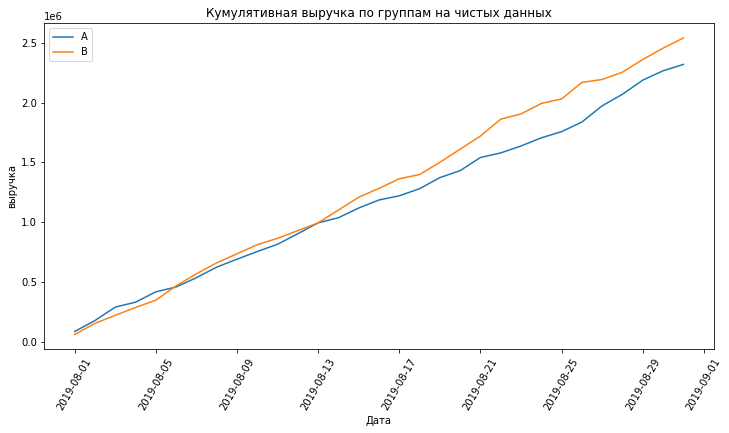

In [43]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,6))
# Строим график выручки группы А
plt.plot(cumulative_revenue_a_filtered['date'], cumulative_revenue_a_filtered['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b_filtered['date'], cumulative_revenue_b_filtered['revenue'], label='B')
plt.xticks(rotation=60 )
plt.title('Кумулятивная выручка по группам на чистых данных')
plt.xlabel('Дата' )
plt.ylabel("выручка")
plt.legend() 
plt.show()

на «очищенных данных» График кумулятивной выручки значительно выровнялся. Группа В лидирует почти всё время

#### Построим графики среднего чека по группам По очищенным данным

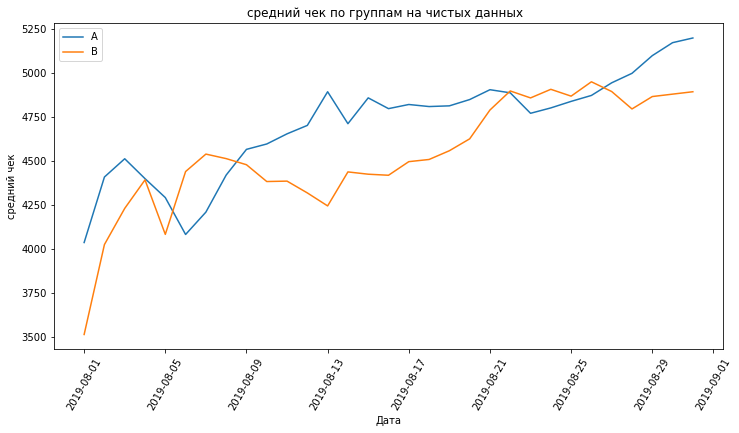

In [44]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a_filtered['date'], cumulative_revenue_a_filtered['revenue']/cumulative_revenue_a_filtered['orders'], label='A')
plt.plot(cumulative_revenue_b_filtered['date'], cumulative_revenue_b_filtered['revenue']/cumulative_revenue_b_filtered['orders'], label='B')
plt.xticks(rotation=60 )
plt.title('средний чек по группам на чистых данных  ')
plt.xlabel('Дата' )
plt.ylabel("средний чек")
plt.legend() 
plt.show()

А вот график среднего чека на чистых данных изменился. Видим большие колебания в начале наблюдений. К концу наблюдений лидировать начала группа А

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным

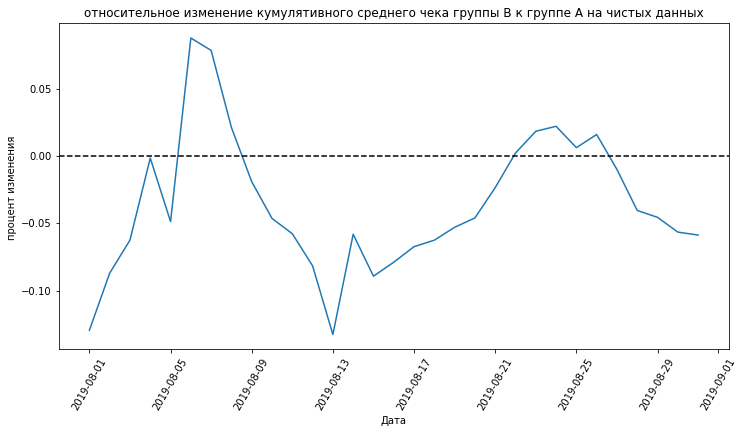

In [45]:
# собираем данные в одном датафрейме
merged_cumulative_revenue_filtered = (
    cumulative_revenue_a_filtered.merge(cumulative_revenue_b_filtered, 
                               left_on='date', 
                               right_on='date', 
                               how='left', 
                               suffixes=['A', 'B'])
)
plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue_filtered['date'], 
         (merged_cumulative_revenue_filtered['revenueB']/merged_cumulative_revenue_filtered['ordersB'])/
         (merged_cumulative_revenue_filtered['revenueA']/merged_cumulative_revenue_filtered['ordersA'])-1)


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=60 )
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A на чистых данных')
plt.xlabel('Дата' )
plt.ylabel("процент изменения ")
plt.show()

Видим большие колебания чем на «сырых» данных. И в конечном итоге лидирует группа А

## Выводы

Мы обнаружили статистически значимые различия между группами А и В по количеству заказов и по «сырым», и по «чистым» данным

По среднему чеку не удалось найти статистически значимое различие между группами А и В ни по «сырым», ни по данным после фильтрации аномалий.
Получается, что клиенты стали покупать больше количественно, но не стали тратить на это больше денег

График относительного изменения кумулятивного среднего чека сообщает, что результаты группы B хуже группы A и нет значительной тенденции к улучшению

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным так как мы увидели увеличение количества заказов каждый из которых в среднем стоит так же, как и до теста. Что в свою очередь увеличивает общую прибыль .


Часть пользователей попало в обе группы тестирования, стоит учесть данный факт при проведении следующих тестов

